In [289]:
import importlib

import pygraphviz as pgv
from IPython.display import Image, display

import graph as glib
import words as wlib
import algorihms
import solver

importlib.reload(glib)
importlib.reload(wlib)
importlib.reload(algorihms)
importlib.reload(solver)

def agraph(graph):
    ag = pgv.AGraph(strict=False, directed=True)

    for node in graph.nodes():
        ag.add_node(node, label=f"{node}-{graph.name(node)}")
    for u, dest_node in enumerate(graph.nodes()):
        for v, weight in graph.edges(dest_node):
            for i in range(int(weight)):
                if graph.name(u) == "s":
                    color = "gray"
                elif graph.name(v) == "t":
                    color = "gray"
                else:
                    color = "blue"
                ag.add_edge(u, v, color=color)
    return ag


def show_graph(graph):
    ag = agraph(graph)
    image = Image(ag.draw(format='png', prog='dot'))
    display(image)


def print_model(model, rjust_n=3):
    print("".rjust(rjust_n),end="")
    for out_node, in_node in model.variables:
        print(f"{out_node}-{in_node}".rjust(rjust_n), end="")
    print()
    for row_i in range(len(model.matrix)):
        print(f"{row_i}".rjust(rjust_n), end="")
        for element in model.matrix[row_i]:
            print(repr(element).rjust(rjust_n), end="")
        print()

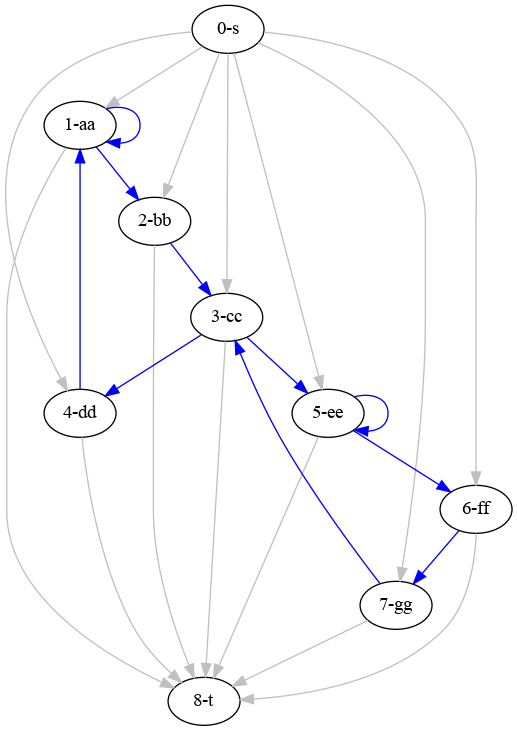

['s', 'aa', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 't']
     0-1 0-2 0-3 0-4 0-5 0-6 0-7 1-2 1-1 1-8 2-3 2-8 3-4 3-5 3-8 4-1 4-8 5-6 5-5 5-8 6-7 6-8 7-3 7-8
   0  -1  -1  -1  -1  -1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   0   0   0   0   0   0  -1   1  -1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
   2   0   1   0   0   0   0   0   1   0   0  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0
   3   0   0   1   0   0   0   0   0   0   0   1   0  -1  -1  -1   0   0   0   0   0   0   0   1   0
   4   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0  -1  -1   0   0   0   0   0   0   0
   5   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0  -1   1  -1   0   0   0   0
   6   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0  -1  -1   0   0
   7   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0  -1  -1
   8   0   0   0   0   0   0   0   0  

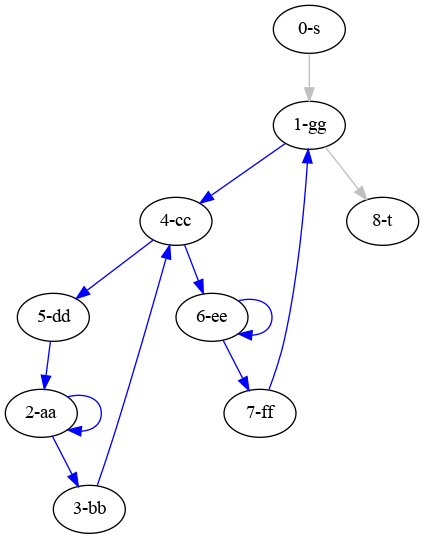

In [290]:
filename="rijeci.txt"
filename="generirane_rijeci.txt"
filename="male_rijeci.txt"
filename="dijamant.txt"

words = wlib.read_words(filename)
graph = wlib.make_graph(words)

show_graph(graph)
print(graph._nodes)

model = solver.WordGameModel(graph)
print_model(model, 4)

res = model.solve()
optimized_graph = model.optimized_graph()

#for var, weight in zip(model.variables, res.x):
#    print(var, weight)
show_graph(optimized_graph)


In [291]:
def names(seq):
    return [optimized_graph.name(n) for n in seq]

path, trail, segments = algorihms.semi_eulerian_path(optimized_graph)
print("trail", [names(t) for t in trail])
print("segments", [names(s) for s in segments])
print("path", names(path))

results = wlib.reconstruct_words(words, optimized_graph, path)
print("words", results)

trail [['s', 'gg'], ['gg', 'cc'], ['cc', 'dd'], ['dd', 'aa'], ['aa', 'bb'], ['bb', 'cc'], ['cc', 'ee'], ['ee', 'ff'], ['ff', 'gg'], ['gg', 't'], ['ee', 'ee'], ['aa', 'aa']]
segments [['s', 'gg', 'cc', 'dd', 'aa', 'bb', 'cc', 'ee', 'ff', 'gg', 't'], ['ee'], ['aa']]
path ['s', 'gg', 'cc', 'dd', 'aa', 'aa', 'bb', 'cc', 'ee', 'ee', 'ff', 'gg', 't']
words ['gg1cc', 'cc1dd', 'dd1aa', 'aa2aa', 'aa1bb', 'bb1cc', 'cc2ee', 'ee2ee', 'ee1ff', 'ff1gg']
